### 一、抓取网页数据

In [3]:
from urllib import request
resp = request.urlopen('https://movie.douban.com/nowplaying/wuhan/')
html_data = resp.read().decode('utf-8')
#print(html_data)

In [4]:
from bs4 import BeautifulSoup as bs
soup = bs(html_data, 'html.parser')    
nowplaying_movie = soup.find_all('div', id='nowplaying')
nowplaying_movie_list = nowplaying_movie[0].find_all('li', class_='list-item')
print(nowplaying_movie_list[0])

<li class="list-item" data-actors="汤姆·哈迪 / 米歇尔·威廉姆斯 / 里兹·阿迈德" data-category="nowplaying" data-director="鲁本·弗雷斯彻" data-duration="107分钟(中国大陆)" data-enough="True" data-region="美国 中国大陆" data-release="2018" data-score="7.4" data-showed="True" data-star="40" data-subject="3168101" data-title="毒液：致命守护者" data-votecount="196554" id="3168101">
<ul class="">
<li class="poster">
<a class="ticket-btn" data-psource="poster" href="https://movie.douban.com/subject/3168101/?from=playing_poster" target="_blank">
<img alt="毒液：致命守护者" class="" rel="nofollow" src="https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2537158013.jpg"/>
</a>
</li>
<li class="stitle">
<a class="ticket-btn" data-psource="title" href="https://movie.douban.com/subject/3168101/?from=playing_poster" target="_blank" title="毒液：致命守护者">
                                    毒液：致命守护...
                                </a>
</li>
<li class="srating">
<span class="rating-star allstar40"></span>
<span class="subject-rate">7.4</span>
</l

In [5]:
nowplaying_list = []
for item in nowplaying_movie_list:
    nowplaying_dict = {}
    nowplaying_dict['id'] = item['data-subject']
    for tag_img_item in item.find_all('img'):
        nowplaying_dict['name'] = tag_img_item['alt']
        nowplaying_list.append(nowplaying_dict)

In [6]:
print(nowplaying_list)
#最新电影的id和名称

[{'id': '3168101', 'name': '毒液：致命守护者'}, {'id': '26147417', 'name': '神奇动物：格林德沃之罪'}, {'id': '27110296', 'name': '无名之辈'}, {'id': '27110363', 'name': '名侦探柯南：零的执行人'}, {'id': '27615233', 'name': '你好，之华'}, {'id': '30323188', 'name': '恐龙王'}, {'id': '26741061', 'name': '胡桃夹子和四个王国'}, {'id': '26793385', 'name': '飓风奇劫'}, {'id': '27102569', 'name': '悲伤逆流成河'}, {'id': '26685451', 'name': '流浪猫鲍勃'}, {'id': '26730542', 'name': '有5个姐姐的我就注定要单身了啊！！'}, {'id': '27202758', 'name': '梦境之源'}, {'id': '26425063', 'name': '无双'}, {'id': '27614899', 'name': '记忆折叠'}, {'id': '26290410', 'name': '昨日青空'}, {'id': '30362631', 'name': '锁'}, {'id': '30346859', 'name': '阴阳眼之瞳灵公馆'}, {'id': '30140571', 'name': '嗝嗝老师'}, {'id': '25857301', 'name': '三国杀·幻'}, {'id': '30143861', 'name': '我的冤家是条狗'}, {'id': '4864908', 'name': '影'}, {'id': '27020981', 'name': '天慕'}]


In [8]:
#对<div class="comment">标签进行解析
requrl = 'https://movie.douban.com/subject/' + nowplaying_list[0]['id'] + '/comments' +'?' +'start=0' + '&limit=20' 
resp = request.urlopen(requrl) 
html_data = resp.read().decode('utf-8') 
soup = bs(html_data, 'html.parser') 
comment_div_lits = soup.find_all('div', class_='comment')

In [105]:
#分析网页函数
def getNowPlayingMovie_list():   
    resp = request.urlopen('https://movie.douban.com/nowplaying/wuhan/')        
    html_data = resp.read().decode('utf-8')    
    soup = bs(html_data, 'html.parser')    
    nowplaying_movie = soup.find_all('div', id='nowplaying')        
    nowplaying_movie_list = nowplaying_movie[0].find_all('li', class_='list-item')    
    nowplaying_list = []    
    for item in nowplaying_movie_list:        
        nowplaying_dict = {}        
        nowplaying_dict['id'] = item['data-subject']       
        for tag_img_item in item.find_all('img'):            
            nowplaying_dict['name'] = tag_img_item['alt']            
            nowplaying_list.append(nowplaying_dict)    
    return nowplaying_list
 
#爬取评论函数
def getCommentsById(movieId, pageNum): 
    eachCommentList = []; 
    start = (pageNum-1) * 20 
    
    requrl = 'https://movie.douban.com/subject/' + movieId + '/comments' +'?' +'start=' + str(start) + '&limit=20' 
    print(requrl)
    resp = request.urlopen(requrl) 
    html_data = resp.read().decode('utf-8') 
    soup = bs(html_data, 'html.parser') 
    comment_div_lits = soup.find_all('div', class_='comment') 
    for each in comment_div_lits:
        item = each.find_all('span',class_='short')
    for eachs in item:
        txtstr = eachs.string
        eachCommentList.append(txtstr)
    return eachCommentList

In [106]:
commentList_temp = getCommentsById(NowPlayingMovie_list[0]['id'], 1)
commentList_temp

https://movie.douban.com/subject/3168101/comments?start=0&limit=20


['3.5  超过期待值。汤老湿怂帅的魅力撑起了这部片，追车戏和最后爆炸戏在摄影上也做的不错。其实是视觉效果升级版的“漫威《寄生兽》”，在惊悚感和浪漫喜剧之间不断做平衡。虽然有几个转折来的太急且存在不少逻辑漏洞，遗憾也很多，但真的是今年漫威最轻、快、爽的一个片。']

In [107]:
#循环获取第一个电影的前10页评论
commentList = []
NowPlayingMovie_list = getNowPlayingMovie_list()
num = 1
for i in range(10):    
    commentList_temp = getCommentsById(NowPlayingMovie_list[0]['id'], num)
    num = i + 1 
    commentList.append(commentList_temp)
    print(commentList)


https://movie.douban.com/subject/3168101/comments?start=0&limit=20
[['3.5  超过期待值。汤老湿怂帅的魅力撑起了这部片，追车戏和最后爆炸戏在摄影上也做的不错。其实是视觉效果升级版的“漫威《寄生兽》”，在惊悚感和浪漫喜剧之间不断做平衡。虽然有几个转折来的太急且存在不少逻辑漏洞，遗憾也很多，但真的是今年漫威最轻、快、爽的一个片。']]
https://movie.douban.com/subject/3168101/comments?start=0&limit=20
[['3.5  超过期待值。汤老湿怂帅的魅力撑起了这部片，追车戏和最后爆炸戏在摄影上也做的不错。其实是视觉效果升级版的“漫威《寄生兽》”，在惊悚感和浪漫喜剧之间不断做平衡。虽然有几个转折来的太急且存在不少逻辑漏洞，遗憾也很多，但真的是今年漫威最轻、快、爽的一个片。'], ['3.5  超过期待值。汤老湿怂帅的魅力撑起了这部片，追车戏和最后爆炸戏在摄影上也做的不错。其实是视觉效果升级版的“漫威《寄生兽》”，在惊悚感和浪漫喜剧之间不断做平衡。虽然有几个转折来的太急且存在不少逻辑漏洞，遗憾也很多，但真的是今年漫威最轻、快、爽的一个片。']]
https://movie.douban.com/subject/3168101/comments?start=20&limit=20
[['3.5  超过期待值。汤老湿怂帅的魅力撑起了这部片，追车戏和最后爆炸戏在摄影上也做的不错。其实是视觉效果升级版的“漫威《寄生兽》”，在惊悚感和浪漫喜剧之间不断做平衡。虽然有几个转折来的太急且存在不少逻辑漏洞，遗憾也很多，但真的是今年漫威最轻、快、爽的一个片。'], ['3.5  超过期待值。汤老湿怂帅的魅力撑起了这部片，追车戏和最后爆炸戏在摄影上也做的不错。其实是视觉效果升级版的“漫威《寄生兽》”，在惊悚感和浪漫喜剧之间不断做平衡。虽然有几个转折来的太急且存在不少逻辑漏洞，遗憾也很多，但真的是今年漫威最轻、快、爽的一个片。'], ['以往大银幕上的漫威超级英雄们，太过于英俊潇洒，伟、光、正，神性大于人性，这两年越来越人性化，而且剑走偏锋，怪、蠢、贱、萌、毒互生，也是一种想象力，这次“毒液”不仅像个“人样”，还是尖牙利齿的怪物，汤老湿和血盆大口的怪兽完美融合，基本无违

In [55]:
requrl = 'https://movie.douban.com/subject/' + nowplaying_list[1]['id'] + '/comments' +'?' +'start=0' + '&limit=20' 
resp = request.urlopen(requrl) 
html_data = resp.read().decode('utf-8') 
soup = bs(html_data, 'html.parser') 
comment_div_lits2 = soup.find_all('div', class_='comment')
comment_div_lits2 

[<div class="comment">
 <h3>
 <span class="comment-vote">
 <span class="votes">7353</span>
 <input type="hidden" value="1521572604">
 <a class="j a_show_login" href="javascript:;" onclick="">有用</a>
 </input></span>
 <span class="comment-info">
 <a class="" href="https://www.douban.com/people/xilouchen/">西楼尘</a>
 <span>看过</span>
 <span class="allstar40 rating" title="推荐"></span>
 <span class="comment-time " title="2018-11-15 23:48:23">
                     2018-11-15
                 </span>
 </span>
 </h3>
 <p class="">
 <span class="short">你的眼睛像火蜥蜴是我笨拙的情话，疯子离开懦夫是她最凶的咒骂，交换亲人让我的愧疚在博格特前显形，歃血为盟使我的爱在厄里斯镜里再现。点金石可以长生，纳吉尼终会成兽，爱心咒语不能保证天长地久，万咒皆终无法阻止核爆之灾。听说魔法世界也有很多爱恨与无奈，麻瓜世界里今年我的入学信还是被寄丢。</span>
 </p>
 </div>, <div class="comment">
 <h3>
 <span class="comment-vote">
 <span class="votes">4100</span>
 <input type="hidden" value="1516402215">
 <a class="j a_show_login" href="javascript:;" onclick="">有用</a>
 </input></span>
 <span class="comment-info">
 <a class="" href="https://www.douban.com/peopl

In [9]:
print(comment_div_lits)

[<div class="comment">
<h3>
<span class="comment-vote">
<span class="votes">2949</span>
<input type="hidden" value="1483986596">
<a class="j a_show_login" href="javascript:;" onclick="">有用</a>
</input></span>
<span class="comment-info">
<a class="" href="https://www.douban.com/people/dreamfox/">乌鸦火堂</a>
<span>看过</span>
<span class="allstar40 rating" title="推荐"></span>
<span class="comment-time " title="2018-10-03 22:03:18">
                    2018-10-03
                </span>
</span>
</h3>
<p class="">
<span class="short">从风格到故事，跟原著完全不同，可以理解北美口碑为啥不好了。但观感是OK的，变成了喜剧片。没有同仇敌忾的小蜘蛛，毒液暴虐不再，成了嘴炮+情感专家，反而特别萌，还教艾迪泡妞，整体就是屌丝逆袭的故事，书粉会不爽（我是粉丝，也觉得不对味）。但为了搭MCU改成这样也是无奈，好在反英雄路线还是保留。铺垫略长，变身特效不错，最后流体大战很好看，汤老师跟小贱贱有的一拼。毒液暴乱之外，另一位太惊艳，年度最佳吻戏，结尾还有那个红家伙的彩蛋（没什么离谱的场面，内地估计不会删）</span>
</p>
</div>, <div class="comment">
<h3>
<span class="comment-vote">
<span class="votes">2685</span>
<input type="hidden" value="1320888266">
<a class="j a_show_login" href="javascript:;" onclick="">有用</a>
</input></span>
<span class=

In [10]:
#提取子元素，先找到<span> class='short'的元素，继续在<span>内部获取元素内的文字
eachCommentList = []
for each in comment_div_lits:
    item = each.find_all('span',class_='short')
    for eachs in item:
        txtstr = eachs.string
        eachCommentList.append(txtstr)
print(eachCommentList)

['从风格到故事，跟原著完全不同，可以理解北美口碑为啥不好了。但观感是OK的，变成了喜剧片。没有同仇敌忾的小蜘蛛，毒液暴虐不再，成了嘴炮+情感专家，反而特别萌，还教艾迪泡妞，整体就是屌丝逆袭的故事，书粉会不爽（我是粉丝，也觉得不对味）。但为了搭MCU改成这样也是无奈，好在反英雄路线还是保留。铺垫略长，变身特效不错，最后流体大战很好看，汤老师跟小贱贱有的一拼。毒液暴乱之外，另一位太惊艳，年度最佳吻戏，结尾还有那个红家伙的彩蛋（没什么离谱的场面，内地估计不会删）', '爽啊！口碑不好是影评人要求太高了吗？？这特效和惊悚性实在太棒了，一点没让我失望。毒液还是个逗比属性也真是十分有趣，从头到尾确认是毒液和Eddie的爱情故事无误。汤老湿演主角是怎么都不会错的，在这里真是蠢萌可爱又性感。两人合体和毒液现身的场面太厉害太酷炫了。姆爷的主题曲也是超级爱了。还有最后的彩蛋伍迪那抹邪魅一笑看得过瘾啊！看一遍不够爽要继续二刷三刷！哎呀妈呀。', '寄生兽嘛不就是，宛如沥青怪。变身毒液之后真是太萌了，太喜欢伸着舌头流口水的样子了，又丑又萌。以及，并没有评价那么差啊，唯一遗憾就是没有做成R级吧，不够凶狠不够躁。时长上，片子也算短小精悍了。汤老师的表现还是很萌的。女毒液也很性感。或者是外媒把期待降太低了，观感还是可以的。以及，两个彩蛋隔得确实挺长。', '以为是R级片，结果是儿童片。汤老湿毫无邪气只有痞气，把一个反派英雄演得正气凛然到闷，而且毒液跟《寄生兽》一样竟然养着养着就变宠物了！当然最让我失望的还是第二彩蛋，你们平行宇宙都是玩过家家的吗...😔', 'QQ的出现比Venom还要alien。', '毒液这哪是选中了汤老湿啊，它根本就是爱上了汤老湿啊！花式撩汉也就算了，还附女主的身来一段饶舌湿吻，我尼玛！！但是，真的太爱汤老湿的表演，让人想到在操蛋的生活面前，那个想刚不敢刚、敢怒不敢怼，时不时怂逼的自己。', '1.像毒液这样的战五渣，随便放两首抖音、快手上的土味鬼畜洗脑歌曲就可以弄死他。\n2.毒液都可以接受生吞活人却对猫猫狗狗手下留情，小动物保护协会还不赶快给他颁个奖？\n3.本以为毒液是个生性残暴、心狠手辣的怪物，结果是个打击罪犯、不杀好人、保护世界的好公民。介于他表现良好，有关部门决定推选他为感动美国年度十大人物，还对他授予“好市民奖”和“三好学生”奖状。\n4.斯坦·李：连我都不

### 二、数据清洗

In [11]:
#为了方便进行数据进行清洗，我们将列表中的数据放在一个字符串数组中
comments = ''
for n in range(len(eachCommentList)):
    comments = comments + (str(eachCommentList[n])).strip()
    #Python strip() 方法用于移除字符串头尾指定的字符（默认为空格或换行符）或字符序列
    #注意：该方法只能删除开头或是结尾的字符，不能删除中间部分的字符
print(comments)

从风格到故事，跟原著完全不同，可以理解北美口碑为啥不好了。但观感是OK的，变成了喜剧片。没有同仇敌忾的小蜘蛛，毒液暴虐不再，成了嘴炮+情感专家，反而特别萌，还教艾迪泡妞，整体就是屌丝逆袭的故事，书粉会不爽（我是粉丝，也觉得不对味）。但为了搭MCU改成这样也是无奈，好在反英雄路线还是保留。铺垫略长，变身特效不错，最后流体大战很好看，汤老师跟小贱贱有的一拼。毒液暴乱之外，另一位太惊艳，年度最佳吻戏，结尾还有那个红家伙的彩蛋（没什么离谱的场面，内地估计不会删）爽啊！口碑不好是影评人要求太高了吗？？这特效和惊悚性实在太棒了，一点没让我失望。毒液还是个逗比属性也真是十分有趣，从头到尾确认是毒液和Eddie的爱情故事无误。汤老湿演主角是怎么都不会错的，在这里真是蠢萌可爱又性感。两人合体和毒液现身的场面太厉害太酷炫了。姆爷的主题曲也是超级爱了。还有最后的彩蛋伍迪那抹邪魅一笑看得过瘾啊！看一遍不够爽要继续二刷三刷！哎呀妈呀。寄生兽嘛不就是，宛如沥青怪。变身毒液之后真是太萌了，太喜欢伸着舌头流口水的样子了，又丑又萌。以及，并没有评价那么差啊，唯一遗憾就是没有做成R级吧，不够凶狠不够躁。时长上，片子也算短小精悍了。汤老师的表现还是很萌的。女毒液也很性感。或者是外媒把期待降太低了，观感还是可以的。以及，两个彩蛋隔得确实挺长。以为是R级片，结果是儿童片。汤老湿毫无邪气只有痞气，把一个反派英雄演得正气凛然到闷，而且毒液跟《寄生兽》一样竟然养着养着就变宠物了！当然最让我失望的还是第二彩蛋，你们平行宇宙都是玩过家家的吗...😔QQ的出现比Venom还要alien。毒液这哪是选中了汤老湿啊，它根本就是爱上了汤老湿啊！花式撩汉也就算了，还附女主的身来一段饶舌湿吻，我尼玛！！但是，真的太爱汤老湿的表演，让人想到在操蛋的生活面前，那个想刚不敢刚、敢怒不敢怼，时不时怂逼的自己。1.像毒液这样的战五渣，随便放两首抖音、快手上的土味鬼畜洗脑歌曲就可以弄死他。
2.毒液都可以接受生吞活人却对猫猫狗狗手下留情，小动物保护协会还不赶快给他颁个奖？
3.本以为毒液是个生性残暴、心狠手辣的怪物，结果是个打击罪犯、不杀好人、保护世界的好公民。介于他表现良好，有关部门决定推选他为感动美国年度十大人物，还对他授予“好市民奖”和“三好学生”奖状。
4.斯坦·李：连我都不认识，下一集就把你写死。
【内地院线版有1个彩蛋，在片尾字

In [12]:
#正则表达式清除标点符号
import re
pattern = re.compile(r'[\u4e00-\u9fa5]+')#至少匹配一个汉字
filterdata = re.findall(pattern,comments)
cleaned_comments = ' '.join(filterdata)
print(cleaned_comments)

从风格到故事 跟原著完全不同 可以理解北美口碑为啥不好了 但观感是 的 变成了喜剧片 没有同仇敌忾的小蜘蛛 毒液暴虐不再 成了嘴炮 情感专家 反而特别萌 还教艾迪泡妞 整体就是屌丝逆袭的故事 书粉会不爽 我是粉丝 也觉得不对味 但为了搭 改成这样也是无奈 好在反英雄路线还是保留 铺垫略长 变身特效不错 最后流体大战很好看 汤老师跟小贱贱有的一拼 毒液暴乱之外 另一位太惊艳 年度最佳吻戏 结尾还有那个红家伙的彩蛋 没什么离谱的场面 内地估计不会删 爽啊 口碑不好是影评人要求太高了吗 这特效和惊悚性实在太棒了 一点没让我失望 毒液还是个逗比属性也真是十分有趣 从头到尾确认是毒液和 的爱情故事无误 汤老湿演主角是怎么都不会错的 在这里真是蠢萌可爱又性感 两人合体和毒液现身的场面太厉害太酷炫了 姆爷的主题曲也是超级爱了 还有最后的彩蛋伍迪那抹邪魅一笑看得过瘾啊 看一遍不够爽要继续二刷三刷 哎呀妈呀 寄生兽嘛不就是 宛如沥青怪 变身毒液之后真是太萌了 太喜欢伸着舌头流口水的样子了 又丑又萌 以及 并没有评价那么差啊 唯一遗憾就是没有做成 级吧 不够凶狠不够躁 时长上 片子也算短小精悍了 汤老师的表现还是很萌的 女毒液也很性感 或者是外媒把期待降太低了 观感还是可以的 以及 两个彩蛋隔得确实挺长 以为是 级片 结果是儿童片 汤老湿毫无邪气只有痞气 把一个反派英雄演得正气凛然到闷 而且毒液跟 寄生兽 一样竟然养着养着就变宠物了 当然最让我失望的还是第二彩蛋 你们平行宇宙都是玩过家家的吗 的出现比 还要 毒液这哪是选中了汤老湿啊 它根本就是爱上了汤老湿啊 花式撩汉也就算了 还附女主的身来一段饶舌湿吻 我尼玛 但是 真的太爱汤老湿的表演 让人想到在操蛋的生活面前 那个想刚不敢刚 敢怒不敢怼 时不时怂逼的自己 像毒液这样的战五渣 随便放两首抖音 快手上的土味鬼畜洗脑歌曲就可以弄死他 毒液都可以接受生吞活人却对猫猫狗狗手下留情 小动物保护协会还不赶快给他颁个奖 本以为毒液是个生性残暴 心狠手辣的怪物 结果是个打击罪犯 不杀好人 保护世界的好公民 介于他表现良好 有关部门决定推选他为感动美国年度十大人物 还对他授予 好市民奖 和 三好学生 奖状 斯坦 李 连我都不认识 下一集就把你写死 内地院线版有 个彩蛋 在片尾字幕前 被叫寄生虫就嚷嚷着要人家道歉的毒液真的是又萌又忠犬 全程就觉得汤老师

In [13]:
cleaned_comments=cleaned_comments.replace(' ','')

In [14]:
cleaned_comments

'从风格到故事跟原著完全不同可以理解北美口碑为啥不好了但观感是的变成了喜剧片没有同仇敌忾的小蜘蛛毒液暴虐不再成了嘴炮情感专家反而特别萌还教艾迪泡妞整体就是屌丝逆袭的故事书粉会不爽我是粉丝也觉得不对味但为了搭改成这样也是无奈好在反英雄路线还是保留铺垫略长变身特效不错最后流体大战很好看汤老师跟小贱贱有的一拼毒液暴乱之外另一位太惊艳年度最佳吻戏结尾还有那个红家伙的彩蛋没什么离谱的场面内地估计不会删爽啊口碑不好是影评人要求太高了吗这特效和惊悚性实在太棒了一点没让我失望毒液还是个逗比属性也真是十分有趣从头到尾确认是毒液和的爱情故事无误汤老湿演主角是怎么都不会错的在这里真是蠢萌可爱又性感两人合体和毒液现身的场面太厉害太酷炫了姆爷的主题曲也是超级爱了还有最后的彩蛋伍迪那抹邪魅一笑看得过瘾啊看一遍不够爽要继续二刷三刷哎呀妈呀寄生兽嘛不就是宛如沥青怪变身毒液之后真是太萌了太喜欢伸着舌头流口水的样子了又丑又萌以及并没有评价那么差啊唯一遗憾就是没有做成级吧不够凶狠不够躁时长上片子也算短小精悍了汤老师的表现还是很萌的女毒液也很性感或者是外媒把期待降太低了观感还是可以的以及两个彩蛋隔得确实挺长以为是级片结果是儿童片汤老湿毫无邪气只有痞气把一个反派英雄演得正气凛然到闷而且毒液跟寄生兽一样竟然养着养着就变宠物了当然最让我失望的还是第二彩蛋你们平行宇宙都是玩过家家的吗的出现比还要毒液这哪是选中了汤老湿啊它根本就是爱上了汤老湿啊花式撩汉也就算了还附女主的身来一段饶舌湿吻我尼玛但是真的太爱汤老湿的表演让人想到在操蛋的生活面前那个想刚不敢刚敢怒不敢怼时不时怂逼的自己像毒液这样的战五渣随便放两首抖音快手上的土味鬼畜洗脑歌曲就可以弄死他毒液都可以接受生吞活人却对猫猫狗狗手下留情小动物保护协会还不赶快给他颁个奖本以为毒液是个生性残暴心狠手辣的怪物结果是个打击罪犯不杀好人保护世界的好公民介于他表现良好有关部门决定推选他为感动美国年度十大人物还对他授予好市民奖和三好学生奖状斯坦李连我都不认识下一集就把你写死内地院线版有个彩蛋在片尾字幕前被叫寄生虫就嚷嚷着要人家道歉的毒液真的是又萌又忠犬全程就觉得汤老师好汤老师太汤老师还能再点吗然后毒液好萌这是一个外星屌丝与地球屌丝联手逆袭的故事区区的尺度小到可以完美通过广电审查的筛子而不必删减丝毫全程杀人不见血恐怖惊悚感大减动作戏来个追车和搏斗就把观众打发了有时感觉像在看卡通片包

In [15]:
f = open("1.txt", 'w+')
f.write(cleaned_comments)
f.close()

In [18]:
#词频统计
import jieba    
import pandas as pd  

segment = jieba.lcut(cleaned_comments)
words_df=pd.DataFrame({'segment':segment})

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/14/j2kbqyps42d389c_2gy6y2980000gn/T/jieba.cache
Loading model cost 1.035 seconds.
Prefix dict has been built succesfully.


In [19]:
words_df.head()

,segment
0,从
1,风格
2,到
3,故事
4,跟


In [20]:
#清除停用词
#coding=utf-8

#encoding='gb18030'解决问题
#编码解码的问题，错误:‘utf-8’不能解码位置0的那个字节（0xa1),即这个字节超出了utf-8的表示范围了
#也就是在读取数据的时候，显式添加编码方式encoding='gb18030'，别的编码也可以试试
#出现这种问题绝大部分情况是因为文件不是 UTF8 编码(例如,可能是 GBK 编码的),而系统默认采用 UTF8 解码,解决方法是改为对应的解码方式
#解决方法很简单，用各种text reader将文件打开，我发现我的文件编码形式是这样的：'ISO-8859-15'然后读取文件加上参数就行了
stopwords=pd.read_csv('chineseStopWords.txt',index_col=False,quoting=3,sep="\t",names=['stopword'], encoding='gb18030')#quoting=3全不引用
words_df=words_df[~words_df.segment.isin(stopwords.stopword)]
words_df.head()

,segment
1,风格
3,故事
5,原著
9,理解
10,北美


### 词频统计

In [26]:
import numpy
words_stat=words_df.groupby(by=['segment'])['segment'].agg({"计数":numpy.size})
words_stat=words_stat.reset_index().sort_values(by=["计数"],ascending=False)
words_stat.head()

/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,segment,计数
353,毒液,25
358,汤,10
469,老师,9
186,好,7
485,英雄,6


### 词云进行显示

In [22]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
import os
os.getcwd()
df = open(r"1.txt")

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
 
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
from wordcloud import WordCloud#词云包
 
wordcloud=WordCloud(font_path="simhei.ttf",background_color="white",max_font_size=80) #指定字体类型、字体大小和字体颜色
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
word_frequence_list = []
for key in word_frequence:
    temp = (key,word_frequence[key])
    word_frequence_list.append(temp)


In [44]:
word_frequence_list

[('毒液', 25),
 ('汤', 10),
 ('老师', 9),
 ('好', 7),
 ('英雄', 6),
 ('戏', 5),
 ('彩蛋', 5),
 ('真的', 5),
 ('特效', 4),
 ('萌', 4),
 ('反', 4),
 ('漫威', 4),
 ('场面', 3),
 ('寄生兽', 3),
 ('宇宙', 3),
 ('电影', 3),
 ('一个', 3),
 ('逼', 3),
 ('喜剧片', 3),
 ('结尾', 3),
 ('屌丝', 3),
 ('老湿', 3),
 ('舌头', 3),
 ('超级', 3),
 ('美国', 3),
 ('失望', 3),
 ('暗黑', 3),
 ('不错', 3),
 ('年度', 3),
 ('颤抖', 3),
 ('惊悚', 3),
 ('性感', 3),
 ('就算', 2),
 ('变身', 2),
 ('变', 2),
 ('手上', 2),
 ('反而', 2),
 ('反派', 2),
 ('暴乱', 2),
 ('拍', 2),
 ('接受', 2),
 ('汤姆', 2),
 ('北美', 2),
 ('表现', 2),
 ('剧情', 2),
 ('观感', 2),
 ('角色', 2),
 ('评价', 2),
 ('贱', 2),
 ('内地', 2),
 ('整体', 2),
 ('超英', 2),
 ('口碑', 2),
 ('汤老', 2),
 ('可爱', 2),
 ('路线', 2),
 ('玩', 2),
 ('理解', 2),
 ('实在', 2),
 ('完美', 2),
 ('爱上', 2),
 ('爱', 2),
 ('男友', 2),
 ('当下', 2),
 ('怂', 2),
 ('合体', 2),
 ('砸', 2),
 ('外星', 2),
 ('程度', 2),
 ('地球', 2),
 ('简单', 2),
 ('简直', 2),
 ('哈迪', 2),
 ('汤老湿', 2),
 ('全程', 2),
 ('故事', 2),
 ('保护', 2),
 ('追车', 2),
 ('一点', 2),
 ('为啥', 2),
 ('逻辑', 2),
 ('风格', 2),
 ('遗憾', 2),
 ('不好', 2),


In [48]:
dict(word_frequence_list)

{'毒液': 25,
 '汤': 10,
 '老师': 9,
 '好': 7,
 '英雄': 6,
 '戏': 5,
 '彩蛋': 5,
 '真的': 5,
 '特效': 4,
 '萌': 4,
 '反': 4,
 '漫威': 4,
 '场面': 3,
 '寄生兽': 3,
 '宇宙': 3,
 '电影': 3,
 '一个': 3,
 '逼': 3,
 '喜剧片': 3,
 '结尾': 3,
 '屌丝': 3,
 '老湿': 3,
 '舌头': 3,
 '超级': 3,
 '美国': 3,
 '失望': 3,
 '暗黑': 3,
 '不错': 3,
 '年度': 3,
 '颤抖': 3,
 '惊悚': 3,
 '性感': 3,
 '就算': 2,
 '变身': 2,
 '变': 2,
 '手上': 2,
 '反而': 2,
 '反派': 2,
 '暴乱': 2,
 '拍': 2,
 '接受': 2,
 '汤姆': 2,
 '北美': 2,
 '表现': 2,
 '剧情': 2,
 '观感': 2,
 '角色': 2,
 '评价': 2,
 '贱': 2,
 '内地': 2,
 '整体': 2,
 '超英': 2,
 '口碑': 2,
 '汤老': 2,
 '可爱': 2,
 '路线': 2,
 '玩': 2,
 '理解': 2,
 '实在': 2,
 '完美': 2,
 '爱上': 2,
 '爱': 2,
 '男友': 2,
 '当下': 2,
 '怂': 2,
 '合体': 2,
 '砸': 2,
 '外星': 2,
 '程度': 2,
 '地球': 2,
 '简单': 2,
 '简直': 2,
 '哈迪': 2,
 '汤老湿': 2,
 '全程': 2,
 '故事': 2,
 '保护': 2,
 '追车': 2,
 '一点': 2,
 '为啥': 2,
 '逻辑': 2,
 '风格': 2,
 '遗憾': 2,
 '不好': 2,
 '这部': 2,
 '逆袭': 2,
 '主角': 2,
 '魅力': 2,
 '霸道': 1,
 '炸天': 1,
 '炫': 1,
 '澳洲': 1,
 '点': 1,
 '爆': 1,
 '漫画': 1,
 '面前': 1,
 '爆炸': 1,
 '足以': 1,
 '演过': 1,
 '隐约': 1,
 '演技': 1,
 

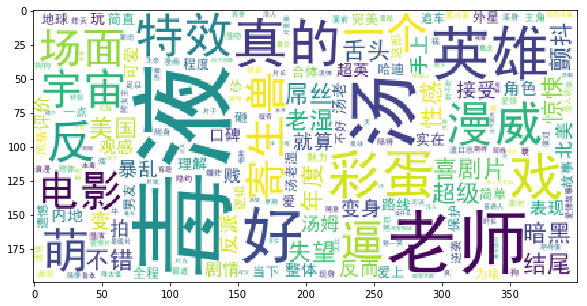

In [51]:
wordcloud=wordcloud.fit_words(dict(word_frequence_list))#list要先转为字典才有items
plt.imshow(wordcloud)

### 完整过程

https://movie.douban.com/subject/3168101/comments?start=0&limit=20
https://movie.douban.com/subject/3168101/comments?start=20&limit=20
https://movie.douban.com/subject/3168101/comments?start=40&limit=20
https://movie.douban.com/subject/3168101/comments?start=60&limit=20
https://movie.douban.com/subject/3168101/comments?start=80&limit=20
https://movie.douban.com/subject/3168101/comments?start=100&limit=20
https://movie.douban.com/subject/3168101/comments?start=120&limit=20
https://movie.douban.com/subject/3168101/comments?start=140&limit=20
https://movie.douban.com/subject/3168101/comments?start=160&limit=20
https://movie.douban.com/subject/3168101/comments?start=180&limit=20


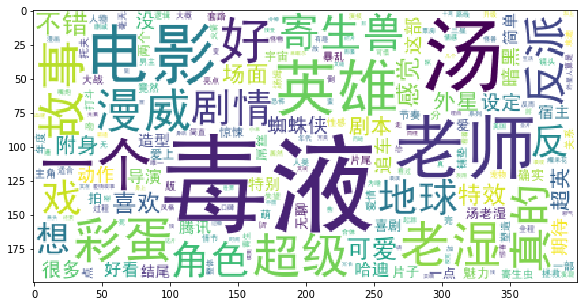

In [8]:
import warnings
warnings.filterwarnings("ignore")
import jieba    #分词包
import numpy    #numpy计算包
import codecs   #codecs提供的open方法来指定打开的文件的语言编码，它会在读取的时候自动转换为内部unicode 
import re
import pandas as pd  
import matplotlib.pyplot as plt
from urllib import request
from bs4 import BeautifulSoup as bs
%matplotlib inline
 
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
from wordcloud import WordCloud#词云包
 
#分析网页函数
def getNowPlayingMovie_list():   
    resp = request.urlopen('https://movie.douban.com/nowplaying/wuhan/')        
    html_data = resp.read().decode('utf-8')    
    soup = bs(html_data, 'html.parser')    
    nowplaying_movie = soup.find_all('div', id='nowplaying')        
    nowplaying_movie_list = nowplaying_movie[0].find_all('li', class_='list-item')    
    nowplaying_list = []    
    for item in nowplaying_movie_list:        
        nowplaying_dict = {}        
        nowplaying_dict['id'] = item['data-subject']       
        for tag_img_item in item.find_all('img'):            
            nowplaying_dict['name'] = tag_img_item['alt']            
            nowplaying_list.append(nowplaying_dict)    
    return nowplaying_list
 
#爬取评论函数
def getCommentsById(movieId, pageNum): 
    eachCommentList = []; 
    start = (pageNum-1) * 20 
    
    requrl = 'https://movie.douban.com/subject/' + movieId + '/comments' +'?' +'start=' + str(start) + '&limit=20' 
    print(requrl)
    resp = request.urlopen(requrl) 
    html_data = resp.read().decode('utf-8') 
    soup = bs(html_data, 'html.parser') 
    comment_div_lits = soup.find_all('div', class_='comment') 
        
    for each in comment_div_lits:
        item = each.find_all('span',class_='short')
        for eachs in item:
            txtstr = eachs.string
            eachCommentList.append(txtstr)
        
    return eachCommentList
 
def main():
    #循环获取第一个电影的前10页评论
    commentList = []
    NowPlayingMovie_list = getNowPlayingMovie_list()
    num = 0
    for i in range(10):    
        commentList_temp = getCommentsById(NowPlayingMovie_list[0]['id'], num+1)
        num = i + 1 
        commentList.append(commentList_temp)
 
    #将列表中的数据转换为字符串
    comments = ''
    for k in range(len(commentList)):
        comments = comments + (str(commentList[k])).strip()
 
    #使用正则表达式去除标点符号
    pattern = re.compile(r'[\u4e00-\u9fa5]+')
    filterdata = re.findall(pattern, comments)
    cleaned_comments = ''.join(filterdata)
 
    #使用结巴分词进行中文分词
    segment = jieba.lcut(cleaned_comments)
    words_df=pd.DataFrame({'segment':segment})
 
    #去掉停用词
    stopwords=pd.read_csv('chineseStopWords.txt',index_col=False,quoting=3,sep="\t",names=['stopword'], encoding='gb18030')#quoting=3全不引用
    words_df=words_df[~words_df.segment.isin(stopwords.stopword)]
 
    #统计词频
    words_stat=words_df.groupby(by=['segment'])['segment'].agg({"计数":numpy.size})
    words_stat=words_stat.reset_index().sort_values(by=["计数"],ascending=False)
 
    #用词云进行显示
    wordcloud=WordCloud(font_path="simhei.ttf",background_color="white",max_font_size=80)
    word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
 
    word_frequence_list = []
    for key in word_frequence:
        temp = (key,word_frequence[key])
        word_frequence_list.append(temp)
 
    wordcloud=wordcloud.fit_words(dict(word_frequence_list))
    plt.imshow(wordcloud)

main()